## Prereq: data from sim_cli.py


In [1]:
import sim_analysis as plume_analysis
import sim_analysis
import tqdm

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

import scipy as sp
import config
# print(config.dataset.keys())

import importlib



In [2]:
# Simulator filename defaults
# fname_puff, fname_wind = 'puff_data_df.pickle', 'wind_data.pickle'
dataset = [
            'constant', #0
            'noisy1',
            'noisy2',
            'noisy3', #3
            'noisy4',
            'noisy5',
            'switch45', #-1
            'test',
           ][3]
windx=5
birthx=5
dataset = f'{dataset}x{windx}b{birthx}'

print(dataset)
# dataset = 'constantx5b5'
# dataset = 'constantx5b5v64'
# dataset = 'noisy1x5b1'
# dataset = 'noisy2x5b1'
dataset = 'noisy3x5b5'
# dataset = 'noisy6x5b5'
# dataset = 'constantx5b1v64' # manuscript fig 1


# data_puffs, data_wind = plume_analysis.load_plume(dataset)
data_puffs, data_wind = plume_analysis.load_plume(dataset, 
                                                  puff_sparsity=0.9,
                                                  radius_multiplier=0.9
                                                 )

noisy3x5b5
noisy3x5b5
Sparsifying puffs to 0.9x


In [3]:
data_puffs.shape, data_wind.shape

((5487732, 11), (3025, 4))

In [4]:
# # Save a snapshot
# def save_snapshot(t_idx_snapshot=3000):
#     puffs_snapshot = data_puffs.query('tidx == @t_idx_snapshot')
#     fname = f'{dataset}_{t_idx_snapshot}_snapshot.csv'
#     puffs_snapshot.to_csv(fname, index=False)
#     return fname

# tidxs = np.random.choice( np.arange(3000, 6000, step=4, dtype=int), 3 )
# print(tidxs)
# fnames = [save_snapshot(t_idx_snapshot=t) for t in tidxs]
# print(fnames)    

# #     puffs_snapshot.shape, len(puffs_snapshot['puff_number'].unique()) 
# #     puffs_snapshot['tidx'].unique().item()

# wind_t = pd.Series({'wind_x': 0.5, 'wind_y':0.0})
# wind_t['wind_x'].item()

In [5]:
# data_puffs['puff_number'].unique().shape

# def sparsify_puffs(data_puffs, sparsity=1.00):
#     sparsity = np.clip(sparsity, a_min=0.01, a_max=1.00)
#     if sparsity > 0.99:
#         return data_puffs
#     else:
#         n_rows = data_puffs.shape[0]
#         n_drop = int(n_rows * (1.00-sparsity))
#         drop_idxs = [1]*n_drop + [0]*(n_rows - n_drop)
#         np.random.shuffle(drop_idxs) # In place
#         drop_idxs = np.argwhere(drop_idxs)[:,0] # Get idxs of all 1s
#         return data_puffs.query("puff_number not in @drop_idxs")
    
# data_puffs_sparse = sparsify_puffs(data_puffs, sparsity=0.5) # Reduce to test out f()
# print(data_puffs['puff_number'].unique().shape, data_puffs_sparse['puff_number'].unique().shape)
# data_puffs = data_puffs_sparse


In [6]:
# xmax_by_tidx = data_puffs[['tidx', 'x']].groupby('tidx').max()
# drop_tidx_max = xmax_by_tidx.reset_index().query("x < 10.0")['tidx'].max()
# drop_tidx_max


## Start data analysis

In [7]:
# flip_multiplier = -1.0 if np.random.uniform() < 0.5 else 1.0 
# data_puffs['y'] *= flip_multiplier
# data_wind['wind_y'] *= flip_multiplier
# print(flip_multiplier)

In [8]:
# Artificially increase wind speed
# Conclusion: doesn't really replicate turbulence of faster plumes, but might be helpful for training
# data_wind['wind_x'] *= 2
# data_puffs['x'] *= 2
# data_puffs['x_minus_radius'] = data_puffs.x - data_puffs.radius
# data_puffs['x_plus_radius'] = data_puffs.x + data_puffs.radius
# data_puffs['y_minus_radius'] = data_puffs.y - data_puffs.radius
# data_puffs['y_plus_radius'] = data_puffs.y + data_puffs.radius

In [9]:
data_puffs.head()

,puff_number,time,x,y,radius,tidx,x_minus_radius,x_plus_radius,y_minus_radius,y_plus_radius,concentration
0,0,0.04,0.024994,-0.002701,0.009445,4,0.015549,0.034424,-0.012146,0.006744,1.186523
0,1,0.04,0.010002,-0.003153,0.009178,4,0.000824,0.019180,-0.012329,0.006027,1.294922
1,2,0.04,0.010002,0.002190,0.009178,4,0.000824,0.019180,-0.006989,0.011368,1.294922
0,0,0.08,0.045013,-0.002823,0.009811,8,0.035217,0.054810,-0.012634,0.006989,1.059570
0,1,0.08,0.029999,0.012894,0.009537,8,0.020462,0.039551,0.003357,0.022430,1.153320


In [10]:
data_puffs.query('puff_number == 0').tail()

,puff_number,time,x,y,radius,tidx,x_minus_radius,x_plus_radius,y_minus_radius,y_plus_radius,concentration
0,0,21.20,9.914062,0.413086,0.199829,2120,9.710938,10.117188,0.213257,0.612793,0.000125
0,0,21.24,9.929688,0.426514,0.200317,2124,9.726562,10.132812,0.226196,0.626953,0.000124
0,0,21.28,9.953125,0.437256,0.200562,2128,9.750000,10.156250,0.236694,0.637695,0.000124
0,0,21.32,9.968750,0.446289,0.200928,2132,9.765625,10.171875,0.245361,0.647461,0.000123
0,0,21.36,9.984375,0.442383,0.201416,2136,9.781250,10.187500,0.240967,0.643555,0.000122


In [11]:
# Slow
# data_puffs.query('puff_number == 0')['radius'].plot()
# data_puffs['radius'].min()

In [12]:
# data_puffs.hist(figsize=(8,8), layout=(5,3));
# plt.tight_layout()

In [13]:
# downsampled_idxs = ((data_puffs['time']*100).astype(int) % 4 == 0)
# data_puffs[downsampled_idxs].head()
# data_wind.query('(time*100) % 4 == 0') # Surprisingly, this works fine!

In [14]:
data_wind.head()

,wind_x,wind_y,time,tidx
0,0.500000,0.000000,0.00,0
4,0.500000,0.000000,0.04,4
8,0.500000,0.000000,0.08,8
12,0.500000,0.000000,0.12,12
16,0.497803,-0.047455,0.16,16


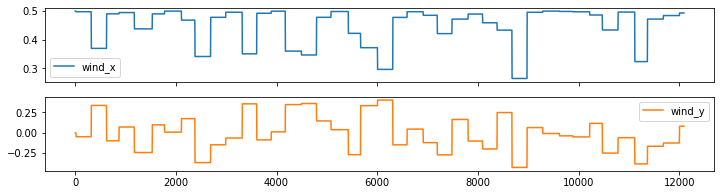

In [15]:
data_wind.iloc[:,:2].plot(subplots=True, figsize=(12,3));

In [16]:
data_wind.shape

(3025, 4)

In [17]:
# Size of puff(s) over time
# (data_puffs['x_plus_radius'] - data_puffs['x_minus_radius']).plot(figsize=(10,2));

In [18]:
# Size of puff(s) over time
# (data_puffs['y_plus_radius'] - data_puffs['y_minus_radius']).plot(figsize=(10,2));

In [19]:
t_val = data_puffs['time'].iloc[-1]
t_val = min(60, t_val -1)
t_val


60

In [20]:
# Look at concentration distribution
# data_at_t = data_puffs[data_puffs.time==t_val]
# alphas = data_at_t.concentration.values

# alphas /= np.max(alphas) # 0...1
# alphas = np.power(alphas, 1/8)
# alphas = np.clip(alphas, 0.2, 1.0)

# pd.Series(alphas).hist(bins=50)
# pd.Series(alphas).value_counts()

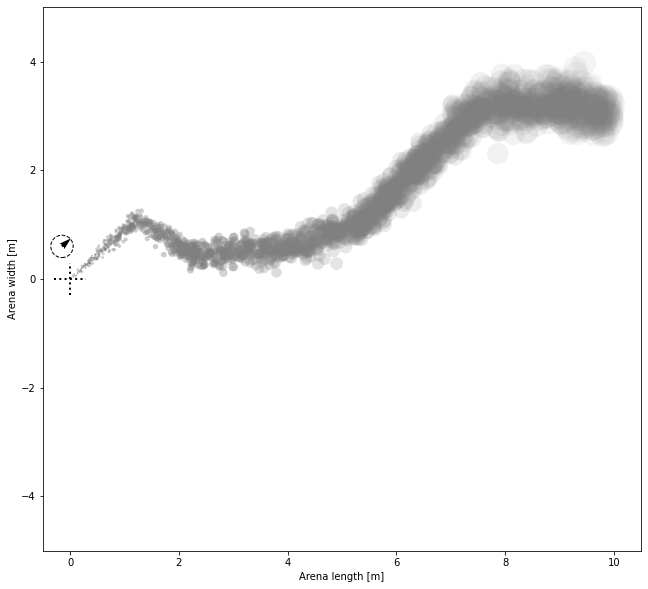

In [21]:
# t_val = min(60, t_val -1)
fname = ''
plotsize=(12,10) # this needs to be bigger than what comes out!
fig, ax = plume_analysis.plot_puffs_and_wind_vectors(data_puffs, data_wind, t_val, 
                                           fname=fname, plotsize=plotsize)

ax.set_xlim(-0.5, 10.5)
# ax.set_xlim(-0.5, 6.5)
ax.set_ylim(-1.2, +1.2)

# ax.set_xlim(-0.2, 2.5)
# ax.set_ylim(-0.5, 0.5)
if 'switch' in dataset:
    ax.set_xlim(-1, +10) # if switching
    ax.set_ylim(-5, +5) # if switching

ax.set_ylim(-5, +5) # if switching
# fig.savefig(f't{t_val:3.3f}.png')
    
# ax.set_ylim(Z['y'].min() - 0.5, Z['y'].max() + 0.5) # adaptive y_lim
# Crosshair at source
plt.plot([0, 0],[-0.3,+0.3],'k-', linestyle = ":", lw=2)
plt.plot([-0.3,+0.3],[0, 0],'k-', linestyle = ":", lw=2)
plt.xlabel('Arena length [m]')
plt.ylabel('Arena width [m]')
plt.savefig('training_plume.pdf', dpi=300, bbox_inches='tight')

In [22]:
# What is true extent of plume?

xmin = -0.5
xmax = 5.5
ymin = -1.0
ymax = +1.0
# x = np.linspace(xmin, xmax, 20)
# y = np.linspace(ymin, ymax, 20)

x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 50)


# xgrid, ygrid = np.meshgrid(x, y)
# xgrid.shape, ygrid.shape
grid_xy = np.meshgrid(x, y)
grid = np.array(grid_xy)
grid.shape

(2, 50, 100)

In [23]:
# Pre-fetch
data_puffs_t = data_puffs[data_puffs.time == t_val]

# Apply -- Long!
getOdor = lambda x : sim_analysis.get_concentration_at_point_in_time_pandas(
    data_puffs_t, t_val, x[0], x[1])
getOdor([0.2, 0.0])

odorMap = np.apply_along_axis(getOdor, 0, grid) # 2 sec for 10x10
odorMap.shape

(50, 100)

In [24]:
# # Multiprocessing version
# import multiprocessing
# from multiprocessing import Pool

# def getOdor(x):
#     return sim_analysis.get_concentration_at_point_in_time_pandas(
#     data_puffs_t, t_val, x[0], x[1])
# getOdor([0.2, 0.0])

In [25]:
# odorMap[odorMap < config.env['odor_threshold']] = 0.0

In [26]:
# pd.Series(odorMap.flatten()).hist(bins=30)

### Manuscript Fig 1 plot

In [27]:
# # Custom colormap
# # https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html

# importlib.reload(sim_analysis)



# import matplotlib.pyplot as plt
# from matplotlib import cm
# from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Greys = cm.get_cmap('Greys', 256)
# newcolors = Greys(np.linspace(0, 1, 256))
# newcolors[:,] = matplotlib.colors.to_rgba('dimgray')
# newcolors[:,3] = 0.5
# newcolors[:,2] = 0
# newcmp = ListedColormap(newcolors)
# print(newcolors[:5,:]*255)

# def plot_examples(cms):
#     """
#     helper function to plot two colormaps
#     """
#     np.random.seed(19680801)
#     data = np.random.randn(30, 30)

#     fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
#     for [ax, cmap] in zip(axs, cms):
#         psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
#         fig.colorbar(psm, ax=ax)
#     plt.show()

# plot_examples([Greys, newcmp])


# # cdict = {'red': np.array([[107,  105, 2],
# #                           [174,  1.0, 1.0],
# #                           [206,  1.0, 1.0]])/255,
# #          'green': np.array([[107,  105, 2],
# #                           [174,  1.0, 1.0],
# #                           [1.0,  1.0, 1.0]])/255,
# #          'blue': np.array([[107,  105, 2],
# #                           [174,  1.0, 1.0],
# #                           [1.0,  1.0, 1.0]])/255,
# #         }

# # newcmp = LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)
# # rgba = newcmp(np.linspace(0, 1, 256))




-13.8046875 0.943359375


/home/satsingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greys"))
  from ipykernel import kernelapp as app
/home/satsingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "png" which is no longer supported as of 3.3 and will become an error two minor releases later


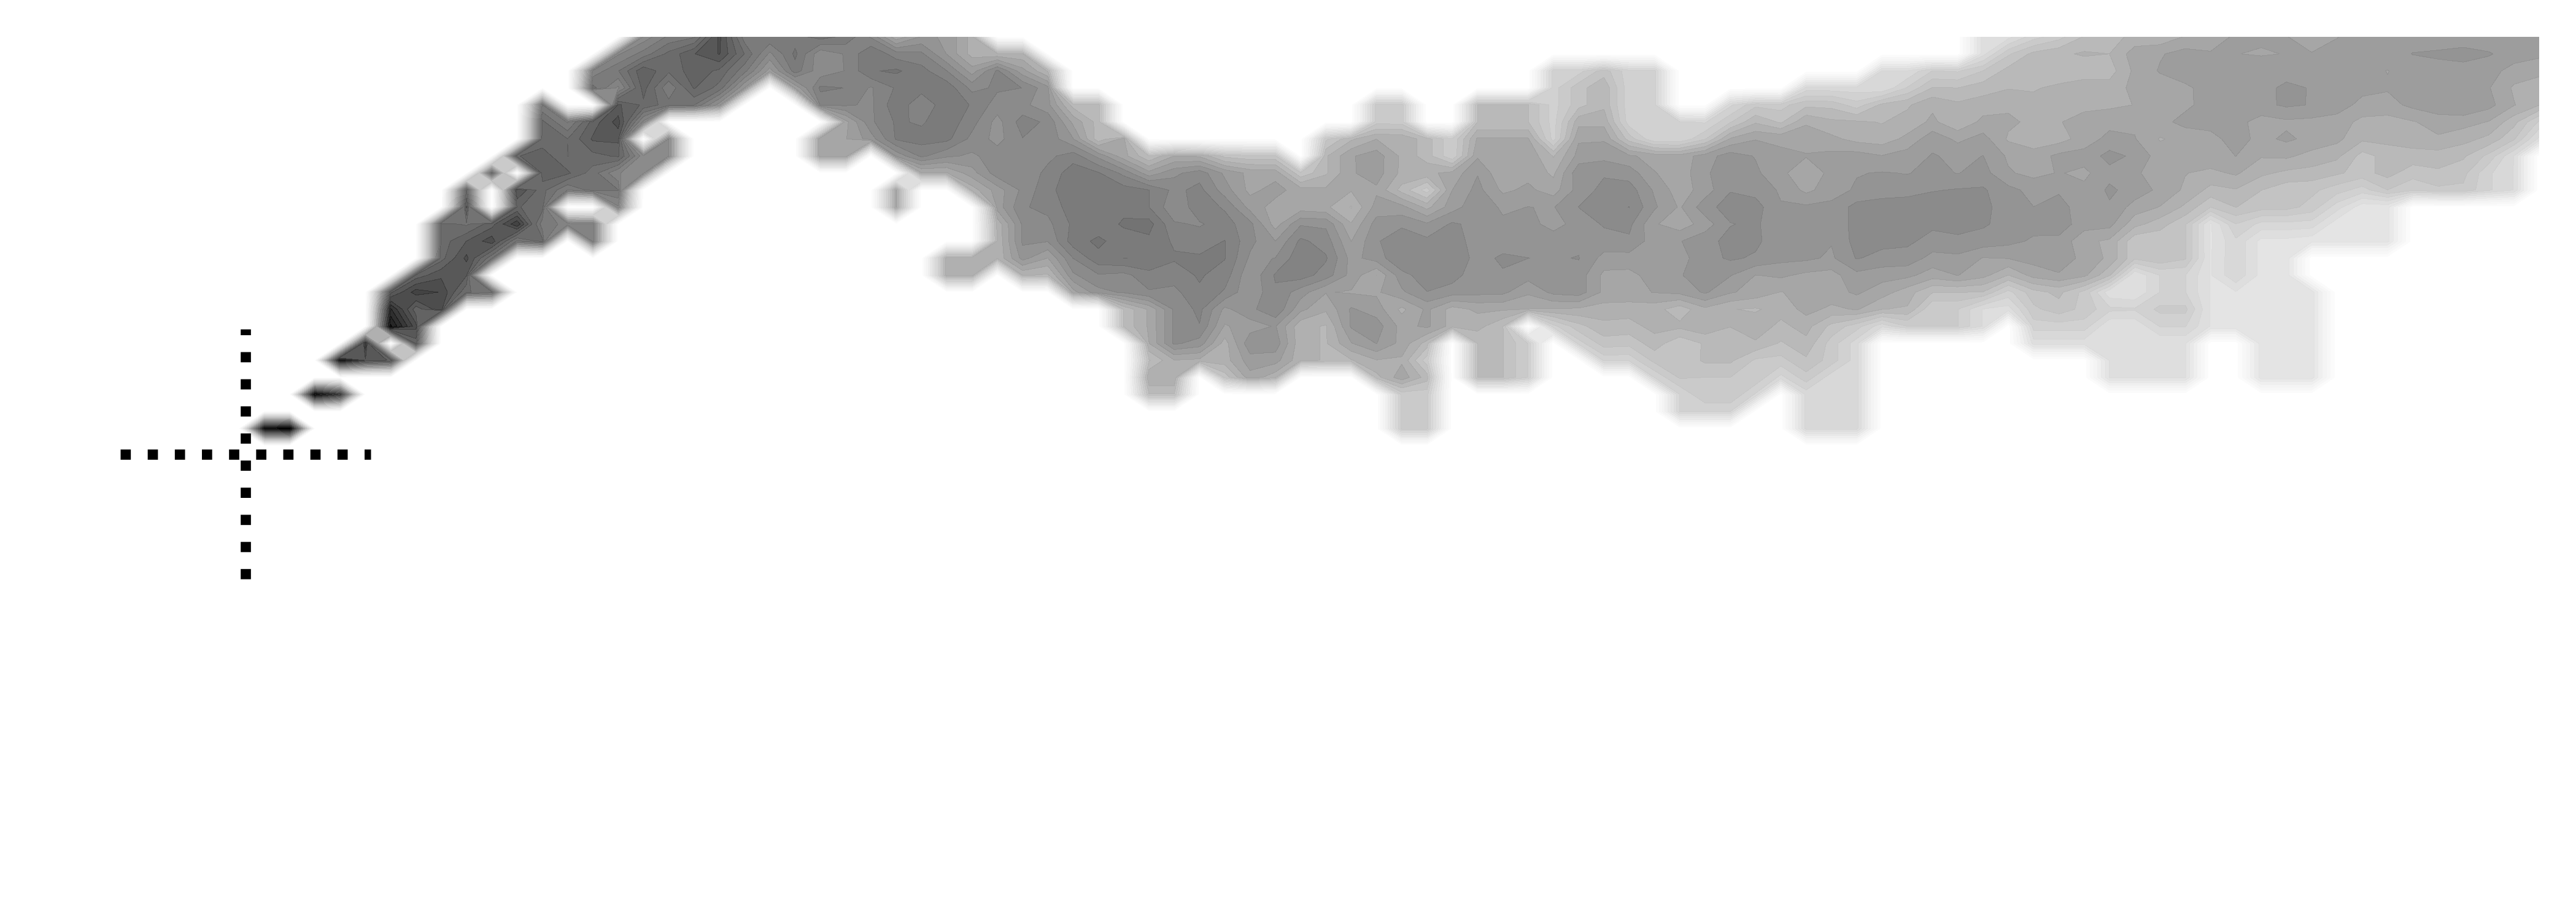

In [28]:

%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.cm as cm
fig = plt.figure(figsize=(12, 3))
logOdorMap = np.log(odorMap**1.5 + 1e-6)
vmax = np.max(logOdorMap) + 0.0
vmin = np.min(logOdorMap) + 0.0
print(vmin, vmax)
# cmap = cm.Greens
cmap = cm.Greys
# cmap = plt.get_cmap('cividis')
# cmap = plt.get_cmap('gist_yarg')

cmap.set_under('white') # white background 
plt.contourf(grid[0,:,:], grid[1,:,:], logOdorMap, 30, 
             alpha=0.9, cmap=cmap, 
             vmin=vmin, vmax=vmax, extend='both')
# plt.colorbar();
ax = plt.gca()
ax.set_xlim(xmin, xmax)
ax.set_aspect('equal')

plt.plot([0, 0],[-0.3,+0.3],'k-', linestyle = ":", lw=2)
plt.plot([-0.3,+0.3],[0, 0],'k-', linestyle = ":", lw=2)
plt.xticks([])
plt.yticks([])

for k in ax.spines:
    ax.spines[k].set_visible(False)

# plt.xlabel('Arena length [m]')
# plt.ylabel('Arena width [m]')
plt.savefig('plume_contourf.pdf', dpi=300, bbox_inches='tight')
plt.savefig('plume_contourf.pdf', png=300, bbox_inches='tight')

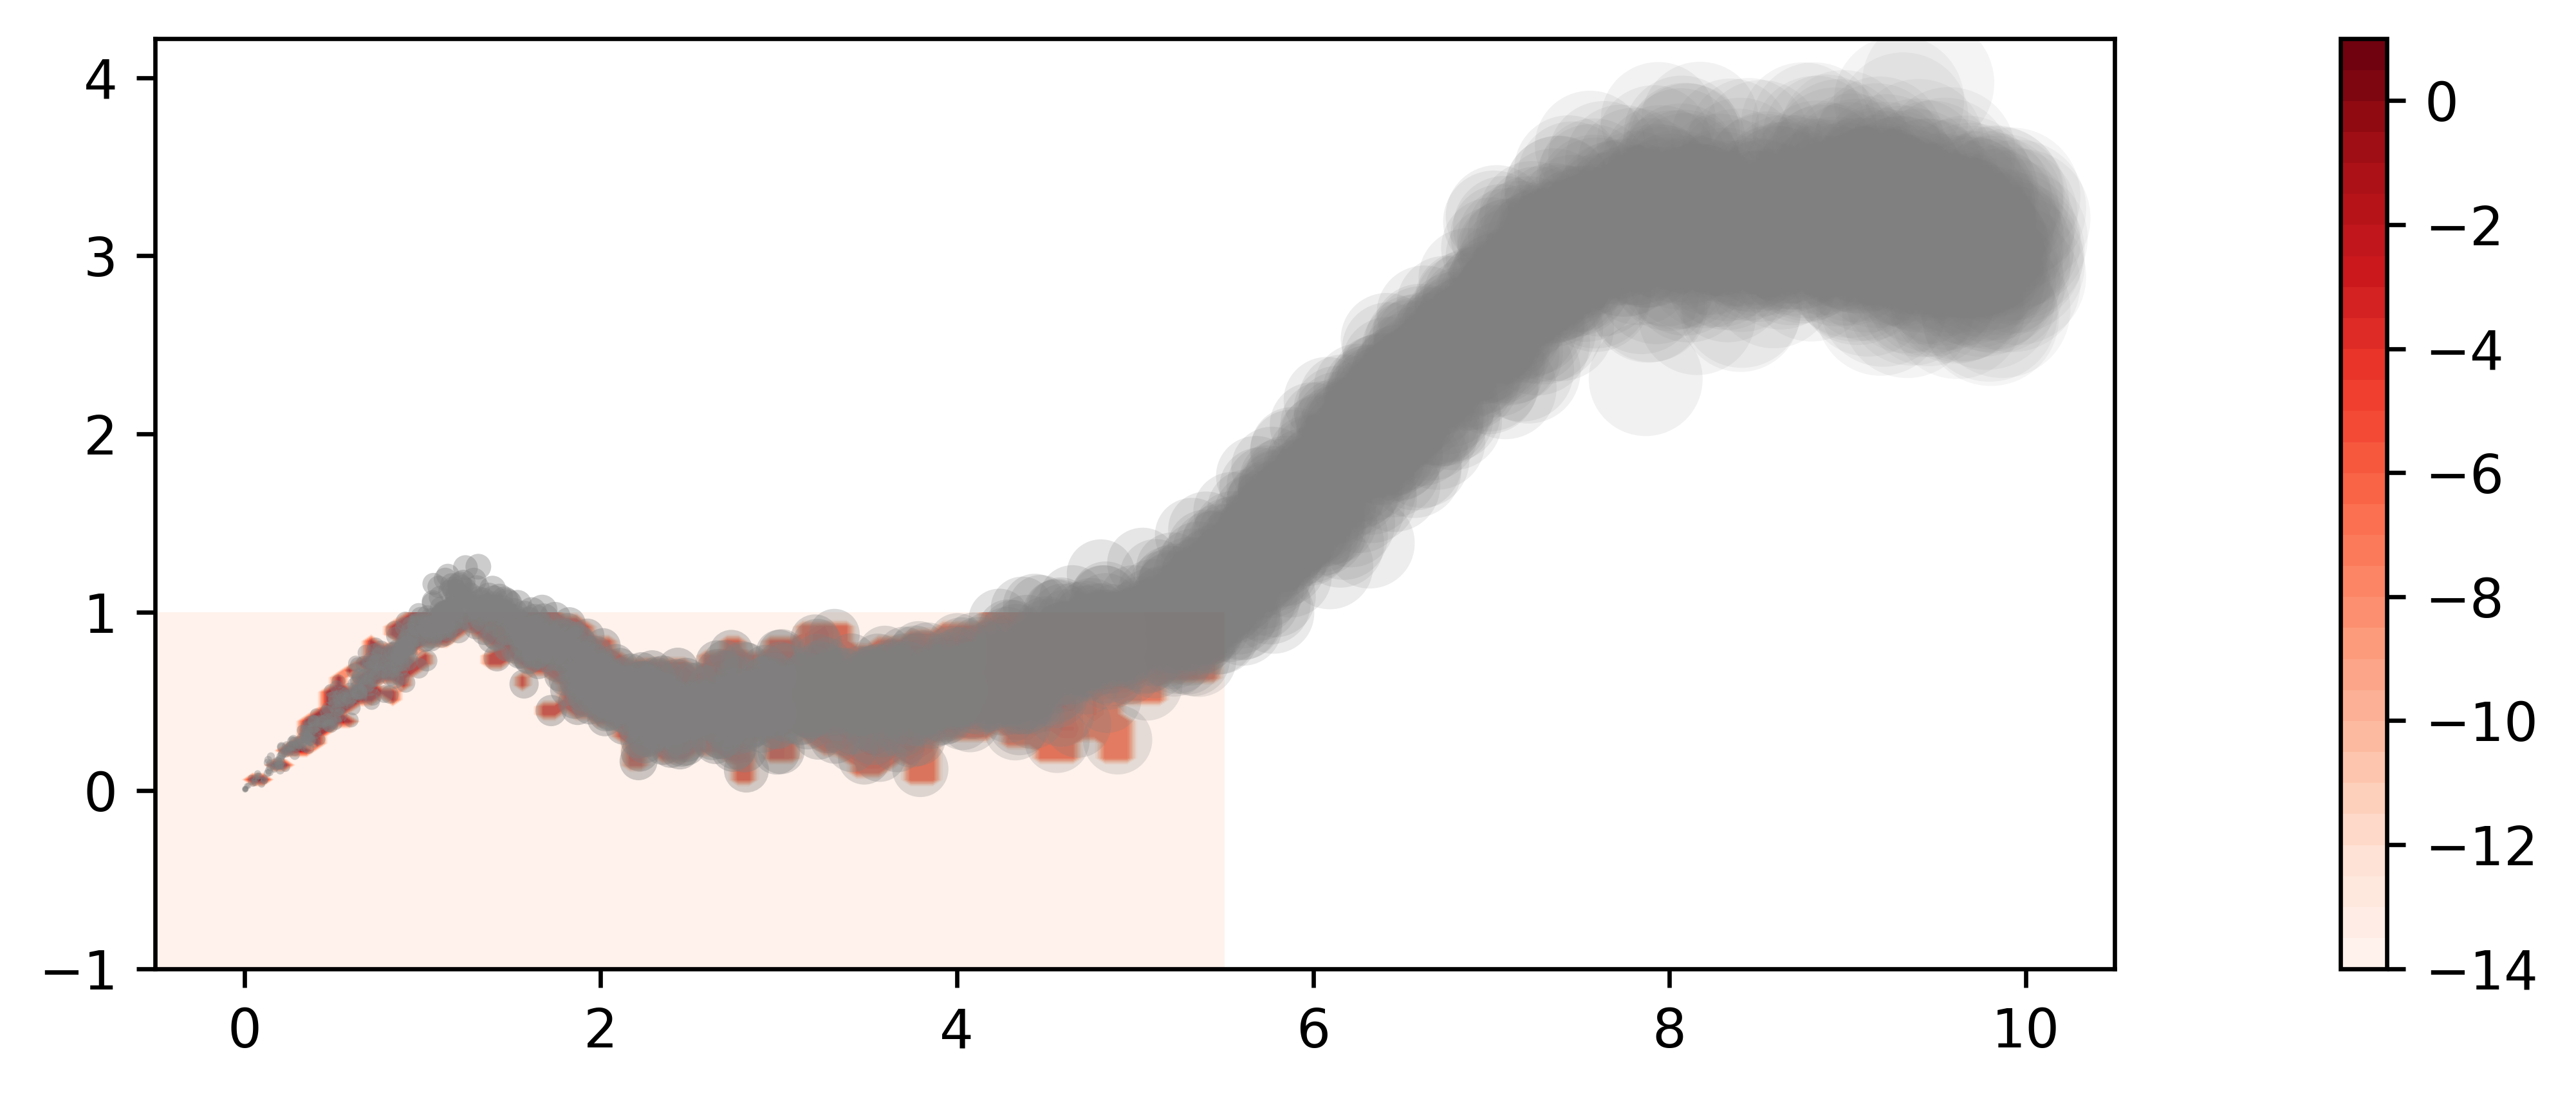

In [29]:
fig = plt.figure(figsize=(12, 3))
plt.contourf(grid[0,:,:], grid[1,:,:], np.log(odorMap + 1e-6), 30, cmap='Reds')
plt.colorbar();
ax = plt.gca()
ax.set_aspect('equal')
plt.tight_layout();

sim_analysis.plot_puffs(data_puffs, t_val, ax)

In [30]:

# fname = ''
# plotsize=(12,3) # this needs to be bigger than what comes out!
# fig, ax = plume_analysis.plot_puffs_and_wind_vectors(data_puffs, data_wind, t_val, 
#                                            fname=fname, plotsize=plotsize)

# ax.set_xlim(-0.5, 15.5)
# ax.set_ylim(-1.8, +1.8)

# plt.contourf(grid[0,:,:], grid[1,:,:], np.log(odorMap + 1e-6), 30, cmap='Reds')
# plt.colorbar();
# plt.tight_layout();



## Plots

In [31]:
# # import matplotlib.pyplot as plt
# # https://stackoverflow.com/questions/23345565/is-it-possible-to-control-matplotlib-marker-orientation
# x = [r for r in range(10)]
# for i in x:
# #     plt.plot(i, i, marker=(4, 0, i*15-15), markersize=20, linestyle='None')
#     plt.plot(i, i, marker=(3, 0, i*15), markersize=20, linestyle='None')



# plt.xlim([0,10])
# plt.ylim([0,10])

# plt.show()

In [32]:
# # Try directed arrows per
# # https://stackoverflow.com/questions/47619545/how-to-plot-a-directed-line-in-matplotlib

# import numpy as np ; np.random.seed(7)
# import matplotlib.pyplot as plt
# from matplotlib.patches import FancyArrowPatch 

# class RL(object):
#     def __init__(self, n, d, s=0.1):
#         a = np.random.randn(n)*s
#         a[0] = np.random.rand(1)*np.pi*2
#         self.xy = np.random.rand(n,2)*5
#         self.xy[1,:] = self.xy[0,:] + np.array([d*np.cos(a[0]),d*np.sin(a[0])])
#         for i in range(2,n):
#             (x,y), = np.diff(self.xy[i-2:i,:], axis=0)
#             na = np.arctan2(y,x)+a[i]
#             self.xy[i,:] = self.xy[i-1,:] + np.array([d*np.cos(na),d*np.sin(na)])
#         self.x = self.xy[:,0]; self.y = self.xy[:,1]

# l1 = RL(1000,0.005)
# l2 = RL(1000,0.007)
# l3 = RL(1000,0.005)

# fig, ax = plt.subplots()
# ax.set_aspect("equal")
# ax.plot(l1.x, l1.y)
# ax.plot(l2.x, l2.y)
# ax.plot(l3.x, l3.y)
# ax.plot(l1.x[0], l1.y[0], marker="o")

# def arrow(x,y,ax,n):
#     d = len(x)//(n+1)    
#     ind = np.arange(d,len(x),d)
#     for i in ind:
#         ar = FancyArrowPatch ((x[i-1],y[i-1]),(x[i],y[i]), 
#                               arrowstyle='->', mutation_scale=20)
#         ax.add_patch(ar)

# arrow(l1.x,l1.y,ax,3)
# arrow(l2.x,l2.y,ax,6)
# arrow(l3.x,l3.y,ax,10)

# plt.show()

In [33]:
# # https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
# # doubling the width of markers
# x = [i*2 for i in range(6)]
# y = [0]*len(x)
# r = [0.1*(r+1) for r in range(len(x))]
# s = [1*(100*2*r[n])**2 for n in range(len(x))] # Not exactly sure how to calc
# plt.scatter(x,y,s=s, marker='o')
# ax.set_aspect('equal')
# plt.xlim([-1, x[-1]+2])
# # plt.ylim([-0.1, 0.1])
# for i in range(len(x)):
#     plt.axvline(x[i]-r[i], color='r', ls='--')
#     plt.axvline(x[i]+r[i], color='r', ls='--')

# plt.show()
# plt.tight_layout()
# [z for z in zip(r, s)]

In [34]:
# x = [0,2,4,6,8,10,12,14,16,18]
# s_exp = [20*2**n for n in range(len(x))]
# s_square = [20*n**2 for n in range(len(x))]
# s_linear = [20*n for n in range(len(x))]
# plt.scatter(x,[1]*len(x),s=s_exp, label='$s=2^n$', lw=1)
# plt.scatter(x,[0]*len(x),s=s_square, label='$s=n^2$') # <---- use this!
# plt.scatter(x,[-1]*len(x),s=s_linear, label='$s=n$')
# plt.ylim(-1.5,1.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
# plt.show()

In [35]:
# fname = ''
# plotsize=(12,12) # this needs to be bigger than what comes out!
# fig, ax = plume_analysis.plot_puffs_and_wind_vectors(data_puffs, data_wind, t_val, 
#                                            fname=fname, plotsize=plotsize)

# ax.set_xlim(-0.15, 0.5)
# ax.set_ylim(-.2, +.2)
# r = data_puffs.loc[:, 'radius'].tolist()[0]
# r 

In [36]:
# # Should I smooth the wind-direction noise?
# local_state = np.random.RandomState(0)
# T = data_wind['time']
# repN, var = 150, 30
# noise = local_state.normal(0, var, int(len(T)/repN)+1)
# noise = np.repeat(noise, repN+1)[:len(T)]
# noise = pd.Series(noise)
# noise.plot(figsize=(15,2))
# noise.shape

In [37]:
# # noise_smooth = noise.ewm(span=30).mean()
# noise_smooth = noise.rolling(50, win_type='triang').mean()
# noise_smooth = noise_smooth.interpolate(limit_direction='backward') # Eliminate NaNs
# noise_smooth = pd.Series(noise_smooth)
# noise_smooth.plot(figsize=(15,2))
# noise_smooth.shape, noise_smooth.head(), noise_smooth.tail()

# Misc/scratch

In [38]:
# # Fixed eval meshgrid
# y_stray = 0.5
# y_min = -1 - y_stray
# y_max = +1 + y_stray
# t = np.array([0.0, 1.0]) # time_offset
# y = np.linspace(y_min, y_max, 5) # loc_y 
# a = np.linspace(0, 2, 9)[:8]*np.pi # angle
# t, y, a
# grid = np.meshgrid(y, a)
# grid = np.array(grid).reshape(2, -1).T # 120 rows x 3 col [loc_y, time_offset, angle
# grid.shape, grid[:32,:]
# grid = pd.DataFrame(grid)
# grid.shape

In [39]:
# y = np.concatenate([ [y[0]-1], y, [y[-1]+1] ])
# y

In [40]:
# t_fixed = 1.5*np.ones((grid.shape[0], 1))
# np.hstack([ t_fixed, grid ]).shape, grid.shape

In [41]:
# np.vstack([grid, grid, grid]).shape

In [42]:
# grid['loc_x'] = 7
# grid['time'] = 1.5

# grid.to_numpy()

## Plume centerline calculation

In [43]:
centerline_filename = f'{config.datadir}/centerline_data_{dataset}.pickle' 
centerline_df = pd.read_pickle(centerline_filename)
centerline_df

,puff_number,time,x,y,tidx,slope,angle
0,0,0.01,0.010002,0.000000,1,NaN,NaN
1,1,0.01,0.005001,0.000000,1,NaN,NaN
2,0,0.02,0.014999,0.000000,2,NaN,NaN
3,1,0.02,0.010002,0.000000,2,NaN,NaN
4,2,0.02,0.005001,0.000000,2,NaN,NaN
...,...,...,...,...,...,...,...
24672807,12097,120.98,0.009865,0.001623,12098,0.164573,0.525960
24672808,12097,120.98,0.009865,0.001623,12098,0.164573,0.525960
24672809,12098,120.98,0.004932,0.000812,12098,0.164493,0.525947
24672810,12098,120.98,0.004932,0.000812,12098,0.164493,0.525947


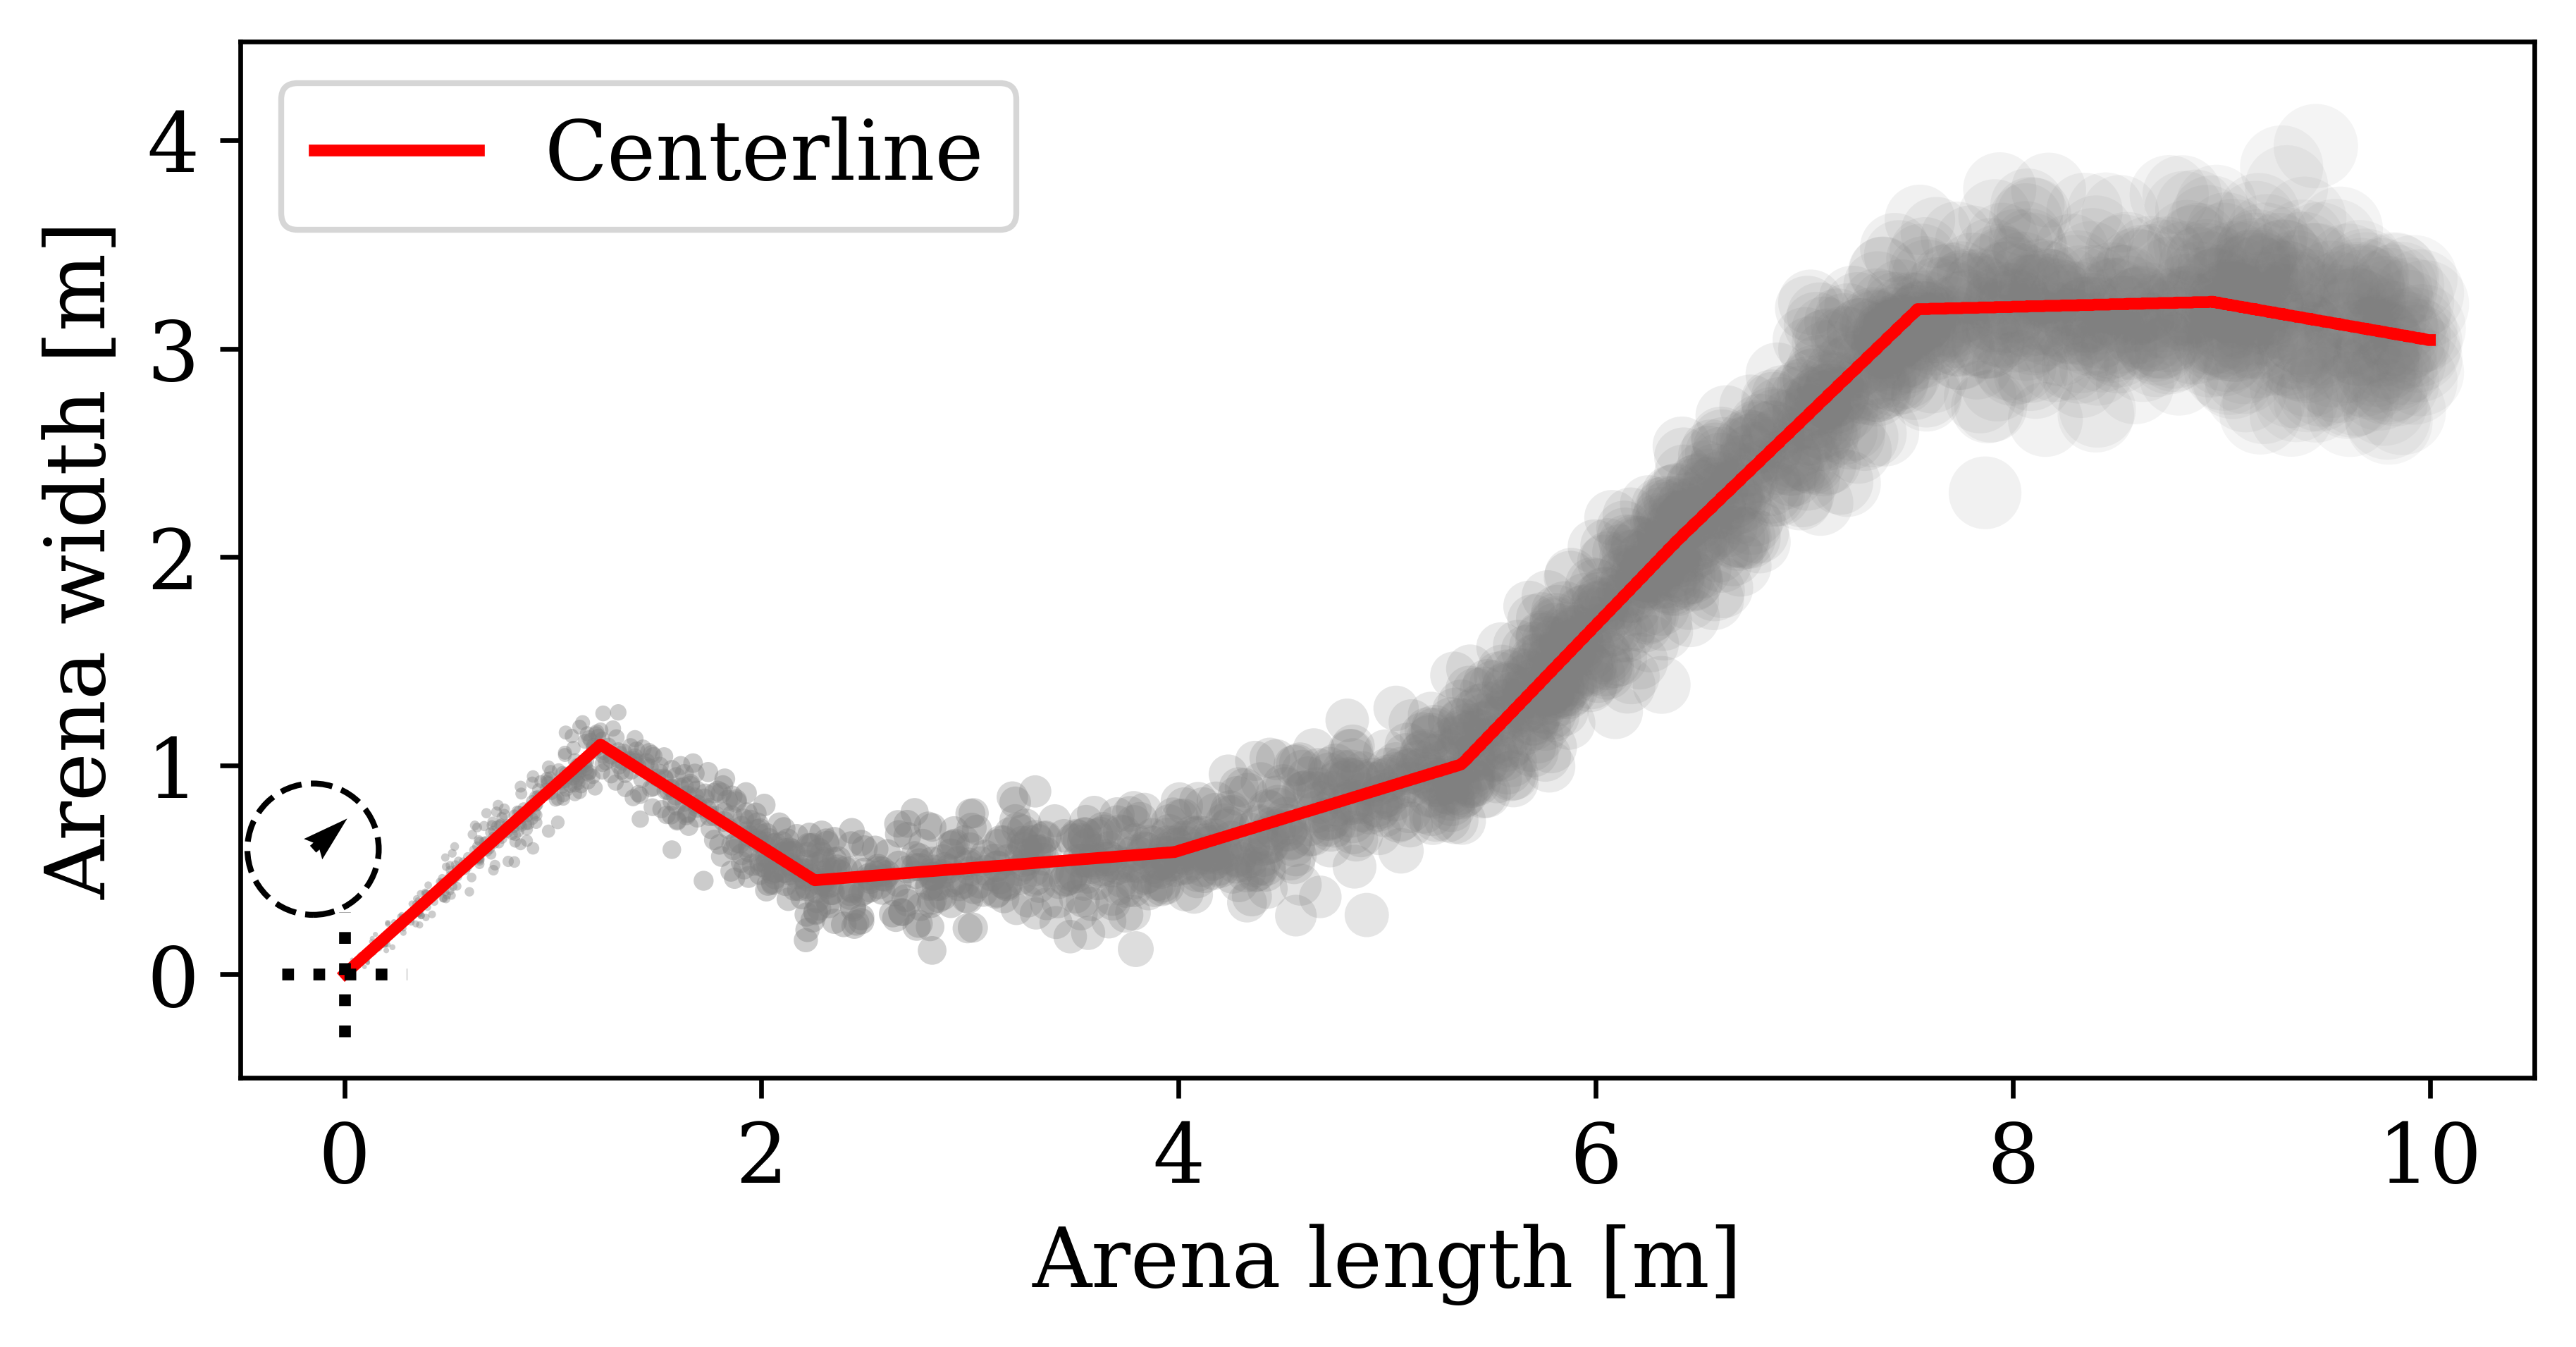

In [44]:
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 300
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

# t_val = min(60, t_val -1)
fname = ''
plotsize=(7,7) # this needs to be bigger than what comes out!
fig, ax = plume_analysis.plot_puffs_and_wind_vectors(data_puffs, data_wind, t_val, 
                                           fname=fname, plotsize=plotsize)
ax.set_xlim(-0.5, 10.5)
ax.set_ylim(-1.2, +1.2)
if 'switch' in dataset:
    ax.set_xlim(-1, +10) # if switching
    ax.set_ylim(-5, +5) # if switching
ax.set_ylim(-5, +5) # if switching


y_max = data_puffs[data_puffs.time == t_val].y.max() + 0.5
y_min = data_puffs[data_puffs.time == t_val].y.min() - 0.5
plt.ylim(y_min, y_max)


# Plot centerline <----
tidx = int(t_val*100)
t_val, tidx
centerline_t = centerline_df[ centerline_df.tidx == tidx ]
plt.plot(centerline_t['x'], centerline_t['y'], lw=2, c='r', label='Centerline')
plt.legend()

# Crosshair at source
plt.plot([0, 0],[-0.3,+0.3],'k-', linestyle = ":", lw=2)
plt.plot([-0.3,+0.3],[0, 0],'k-', linestyle = ":", lw=2)
plt.xlabel('Arena length [m]')
plt.ylabel('Arena width [m]')
plt.savefig(f'plume_centerline_{dataset}.pdf', dpi=300, bbox_inches='tight')
plt.savefig(f'plume_centerline_{dataset}.svg', bbox_inches='tight')

count    2320.000000
mean        0.363721
std         0.551386
min        -0.661765
25%        -0.000000
50%         0.300000
75%         0.901639
max         1.071429
Name: slope, dtype: float64

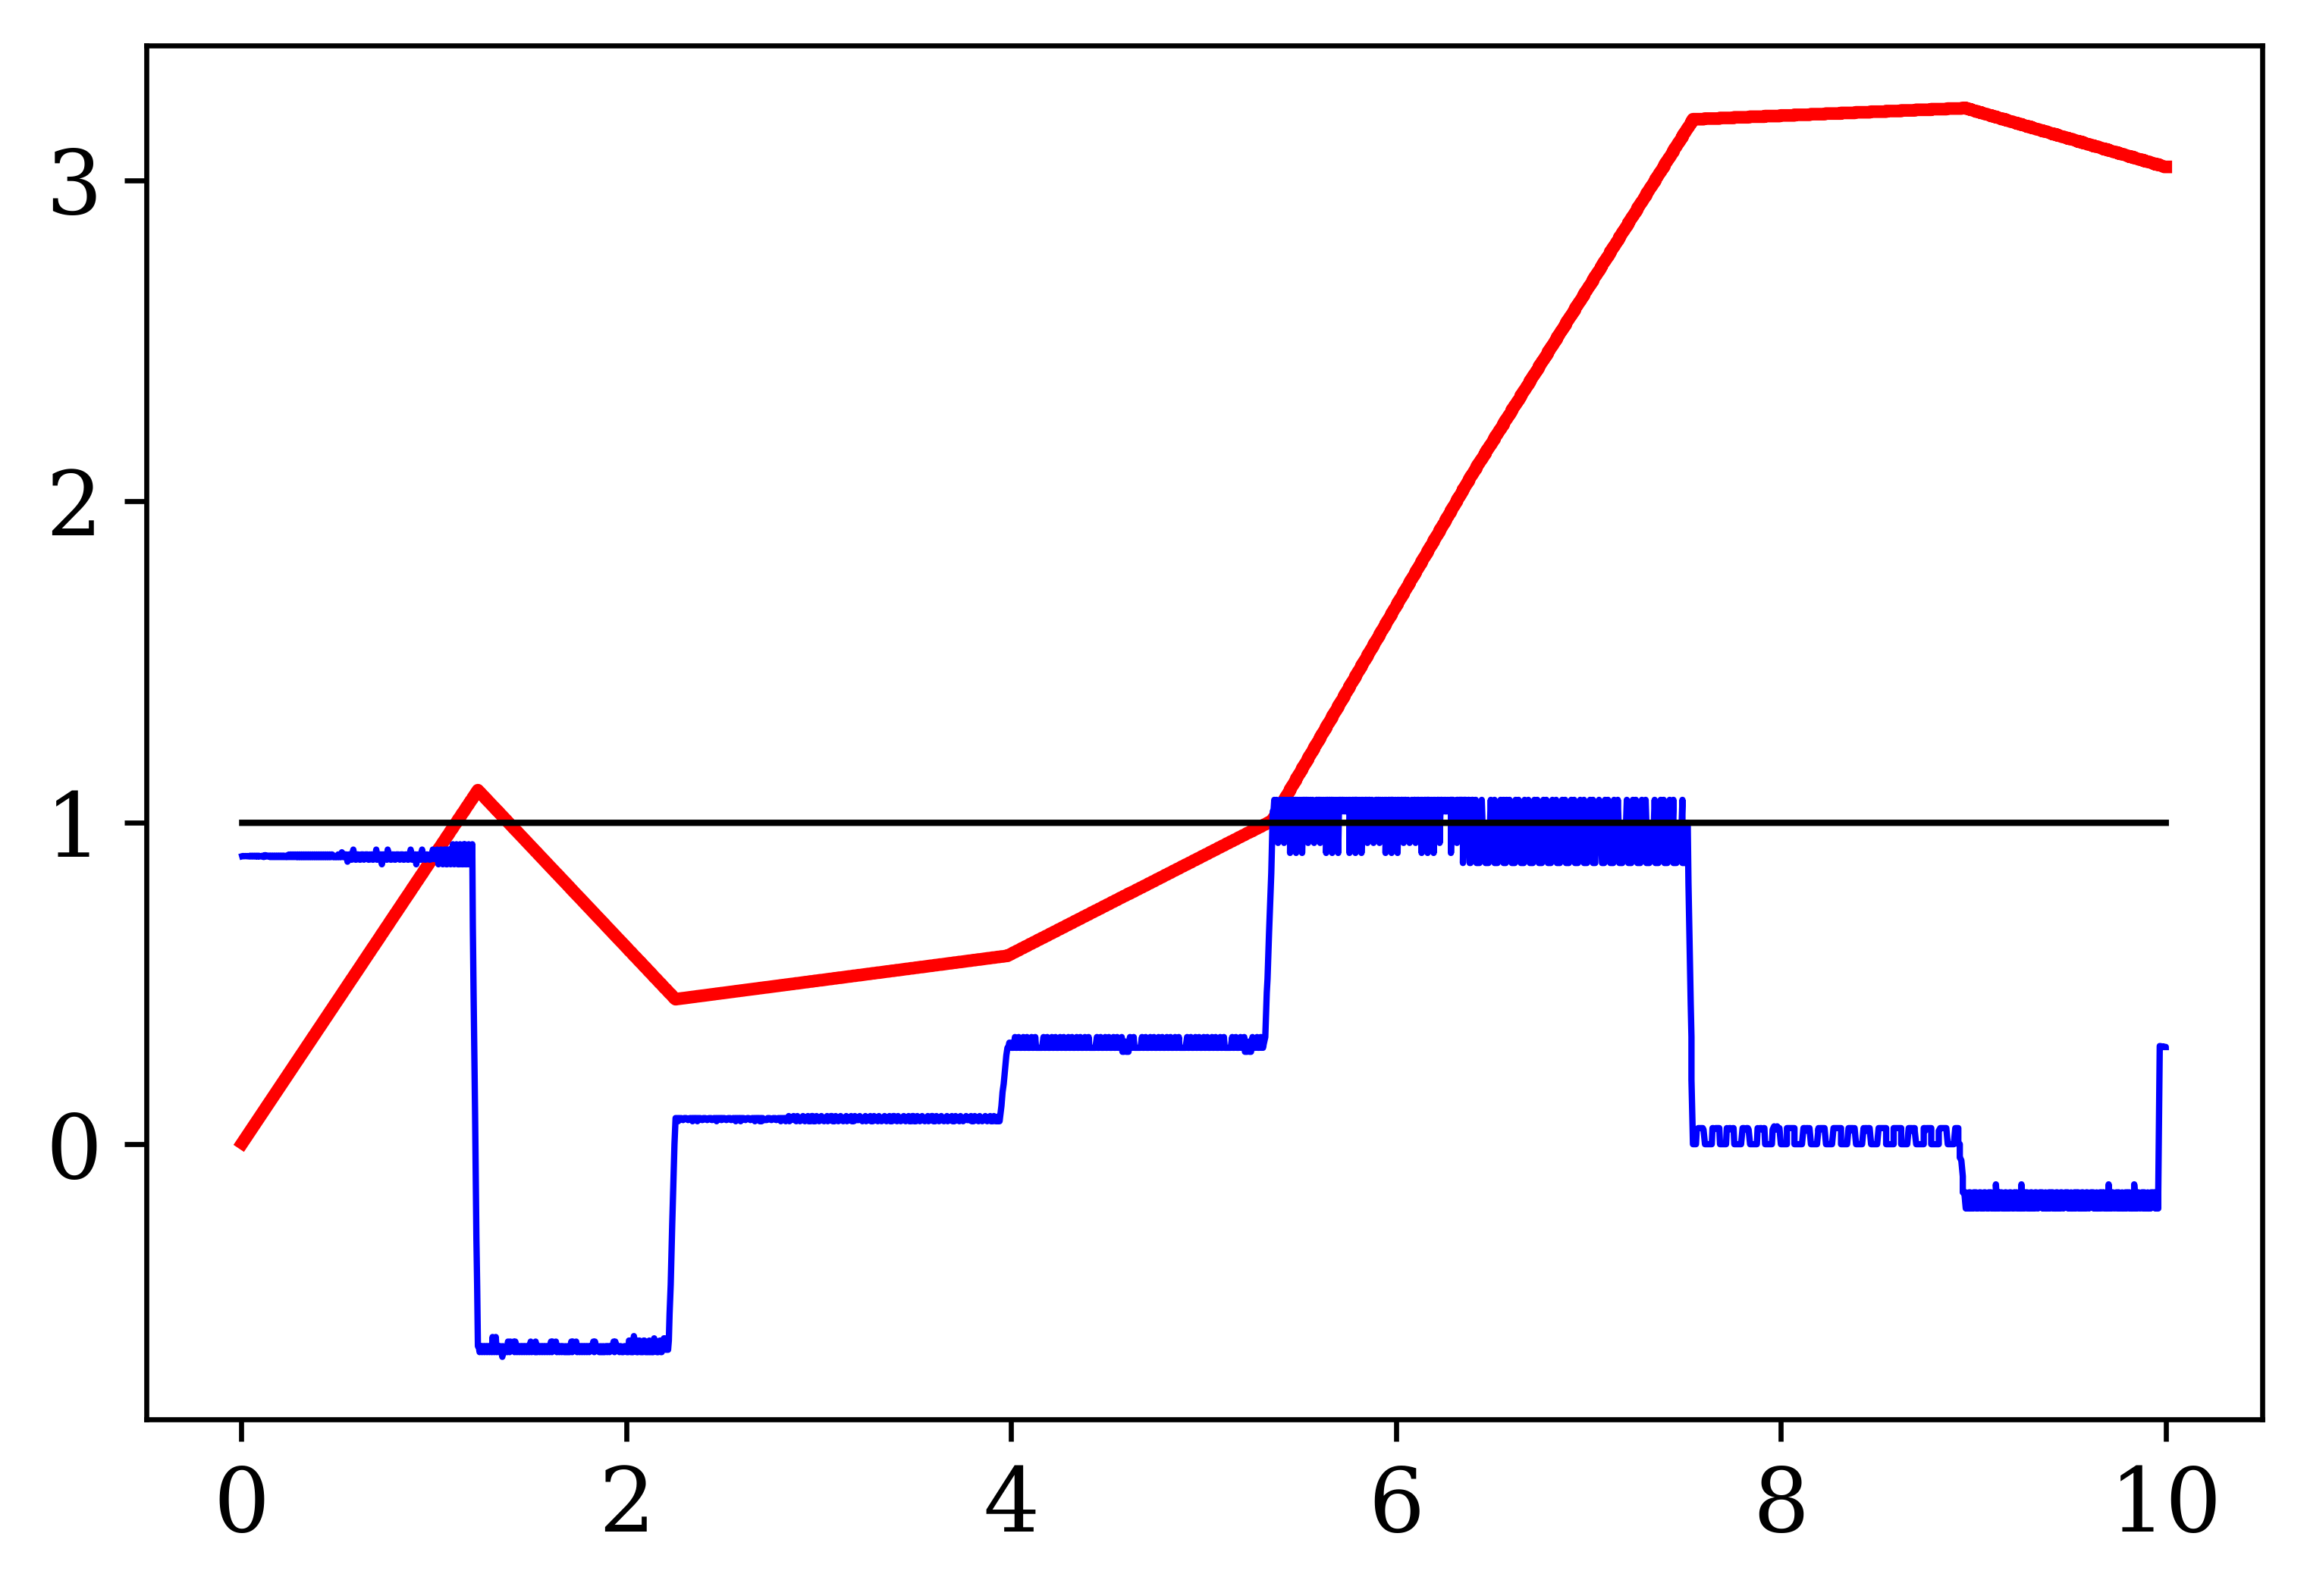

In [45]:
centerline_t = centerline_df[ centerline_df.tidx == tidx ]
plt.plot(centerline_t['x'], centerline_t['y'], lw=2, c='r')
plt.plot(centerline_t['x'], centerline_t['slope'], lw=1, c='b')
plt.plot(centerline_t['x'], [1]*len(centerline_t), lw=1, c='k')
centerline_t['slope'].describe()